In [4]:
import matplotlib.pyplot as plt
import pandas as pd # data frame library
import numpy as np # scientific computing library
from statistics import *

# we reuse our Titanic passengers data
data = pd.read_csv("titanic.csv")
data.head(10)

,passengerID,name,age,fare,sex,survived
0,1,"Braund, Mr. Owen Harris",22.0,7.2500,male,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,female,1
2,3,"Heikkinen, Miss. Laina",26.0,7.9250,female,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,female,1
4,5,"Allen, Mr. William Henry",35.0,8.0500,male,0
5,6,"Moran, Mr. James",NaN,8.4583,male,0
6,7,"McCarthy, Mr. Timothy J",54.0,51.8625,male,0
7,8,"Palsson, Master. Gosta Leonard",2.0,21.0750,male,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,11.1333,female,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,30.0708,female,1


##### We have so far talked about the data types of the attributes in the data but that is just how data is stored, there is another classification system for statistical data:
* Categorical
* Numerical
    * Discrete
    * Continuous

##### Q. What attributes are categorical in the Titanic data? Which ones are numerical?
##### Q. When would I use one over the other?
##### Q. Can I convert a numerical attribute to a categorical one? What about the other way around?

## Summary Statistics
* information that gives a quick and simple description of the data.
* used to summarize a set of observations

###### Basic summary statistics include
* min
* max
* mean
* median
* standard deviation
* variance
* number of missing values (not quite a summary statistic but equally important)

In [5]:
data.describe() # built-in summary statistics function

,passengerID,age,fare,survived
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,32.204208,0.383838
std,257.353842,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,20.125000,7.910400,0.000000
50%,446.000000,28.000000,14.454200,0.000000
75%,668.500000,38.000000,31.000000,1.000000
max,891.000000,80.000000,512.329200,1.000000


##### Q. Why does the describe function not provide the summary statistics for name and sex?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
passengerID    891 non-null int64
name           891 non-null object
age            714 non-null float64
fare           891 non-null float64
sex            891 non-null object
survived       891 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [7]:
survived = data['survived'] == 1
data.loc[survived].describe()

,passengerID,age,fare,survived
count,342.000000,290.000000,342.000000,342.0
mean,444.368421,28.343690,48.395408,1.0
std,252.358840,14.950952,66.596998,0.0
min,2.000000,0.420000,0.000000,1.0
25%,250.750000,19.000000,12.475000,1.0
50%,439.500000,28.000000,26.000000,1.0
75%,651.500000,36.000000,57.000000,1.0
max,890.000000,80.000000,512.329200,1.0


In [8]:
data['isFemale'] = data['sex'].map({'female': 1, 'male': 0})

In [9]:
def converter(x):
    if x == 'female':
        return 1
    elif x == 'male':
        return 0


data['isFemale'] = data['sex'].apply(converter)


##### Q. Would it still be appropriate to try and find the min, max, mean etc. for isFemale attribute? Think back to categorical vs numerical attributes

In [10]:
females = data['isFemale'] == 1
data.loc[females,'age'].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: age, dtype: float64

In [11]:
males = data['isFemale'] == 0
data.loc[males,'age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <a list of 10 Patch objects>)

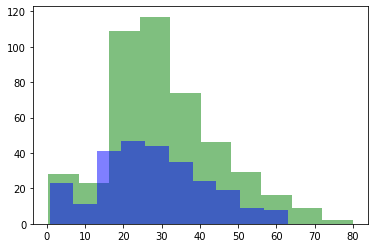

In [13]:
male_age = data.loc[males,'age']
female_age = data.loc[females,'age']

plt.hist(male_age, alpha=0.5, bins = 10, color='g', label='males',stacked=True)
plt.hist(female_age, alpha=0.5, bins = 10, color='b', label='females',stacked=True)